#  Install package

In [24]:
# ! pip install pyvis
# ! pip install networkx

# Import package

In [25]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
import openai
from IPython.display import display, HTML, Code
from IPython.display import clear_output

# Define Solution class
Please run the following cell to define the functions

In [26]:
import LLM_Geo_Constants as constants
import helper

from LLM_Geo_kernel import Solution

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration Cases

## Input task and data desciption

In [27]:
isReview = True

In [28]:

# Case 1: population living near hazardous wastes

task_name ='Resident_at_risk_counting'

TASK = r"""1) Find out the total population that lives within a Census tract that contain hazardous waste facilities. The study area is North Carolina, US.
2) Generate a population choropleth map for all tracts, and highlight the borders of tracts that have hazardous waste facilities.
"""

DATA_LOCATIONS = ["NC hazardous waste facility ESRI shape file: https://github.com/gladcolor/LLM- Geo/raw/master/overlay_analysis/Hazardous_Waste_Sites.zip.",
                  "NC tract boundary shapefile: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_shp_37.zip. The tract ID column is 'Tract'.",
                  "NC tract population CSV file: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv. The population is stored in 'TotalPopulation' column. The tract ID column is 'GEOID'."
                 ]
 
# # Case 2: France_mobility_changes_2020
# task_name ='France_mobility_changes_2020'
# TASK = r'''
# 1) Show the 2020 human mobility monthly change rates of each administrative regions in a France choropleth map. Each month is a sub-map in a map matrix，12 months in total. All monthly maps need to use the same colorbar range (color scheme: coolwarm). The base of the change rate is January 2020. 
# 2) Draw a line chart to show the monthly change rate trends of all administrative regeions. Each region is a line (the region name is the legend), the x-axis is 2020 months.
# '''

# DATA_LOCATIONS = ["ESRI shapefile for France administrative regions:" + \
#                   "https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip. " + \
#                   "The 'GID_1' column is the administrative region code, 'NAME_1' column is the administrative region name.",
#                   "REST API url with parameters for daily human mobility data access:" + \
#                   "http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020." + \
#                   "The response is in CSV format. There are three columns in the response: " + \
#                   "place,date (format:2020-01-07), and intra_movement. 'place' column is the administractive region code of every country;" + \
#                   "codes for France administrative regions start with 'FRA'. Use the total intra_movement of the month as the montly mobility.",
#                  ]

# # Case 3: COVID-19 prevalence trend
# task_name ='COVID_death_rate'
# TASK = r'''1) Draw a map to show the death rate (death/case) of COVID-19 among the countiguous US counties. Use the accumulated COVID-19 data of 2020.12.31 to compute the death rate. Use scheme ='quantiles' when plotting the map.  Set map projection to 'Conus Albers'. Set map size to 15*10 inches.  
# 2) Draw a scatter plot to show the correlation and trend line of the death rate with the senior resident rate, including the r-square and p-value. Set data point transparency to 50%, regression line as red.  Set figure size to 15*10 inches.  
# '''


# DATA_LOCATIONS = [
#                   r"COVID-19 data case in 2020 (county-level): https://github.com/nytimes/covid-19-data/raw/master/us-counties-2020.csv. This data is for daily accumulated COVID cases and deaths for each county in the US. There are 5 columns: date (format: 2021-02-01), county, state, fips, cases, deaths. ",   
#                   r"Contiguous US county boundary (ESRI shapefile): https://github.com/gladcolor/spatial_data/raw/master/contiguous_counties.zip. The county FIPS column is 'GEOID'. ",
#                   r"Census data (ACS2020): https://raw.githubusercontent.com/gladcolor/spatial_data/master/Demography/ACS2020_5year_county.csv. THe needed columns are: 'FIPS', 'Total Population', 'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years', 'Total Population: 85 Years and Over'. Drop rows with NaN cells after loading the used columns.",
#                  ]




# # Case 4: Hospital_accessibility
# task_name ='Hospital_accessibility'
# TASK = r'''
# For each zipcode area in South Carolina (SC), calculate the distance from the centroid of the zipcode area to its nearest hospital, and then create a choropleth distance map of zipcode area polygons (unit: km), also show the hospital.
# '''

# DATA_LOCATIONS = [
# r"SC zipcode boundary shapefile: https://github.com/GIBDUSC/test/raw/master/sc_zip_boundary.zip, the map projection is WGS1984.",
# r"SC hospitals:  https://github.com/gladcolor/spatial_data/raw/master/South_Carolina/SC_hospitals_with_emergency_room_cleaned.csv, location columns: longitude in 'POINT_X' column, latitude in 'POINT_Y' column.",          
# ]


## Case 5: Census API
# task_name ='Census_API'
# TASK = r''' Show the spatial distribution of the county level median income in the contigous US. Set figure size to (25,15)
# '''

# DATA_LOCATIONS = [
#       "You can use the Census API.",
# ]


# DATA_LOCATIONS = [
# '''Census API key: ae7be70727932dd6aed257692de3f344365d0678'''              
# ]



save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
model=r"gpt-4"
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional Geo-information scientist and developer good at Python. 

Your task: Generate a graph (data structure) only, whose nodes are (1) a series of consecutive steps and (2) data to solve this question:  
 1) Find out the total population that lives within a Census tract that contain hazardous waste facilities. The study area is North Carolina, US.
2) Generate a population choropleth map for all tracts, and highlight the borders of tracts that have hazardous waste facilities.
 

Your reply needs to meet these requirements: 
 1. Think step by step.
2. Steps and data (both input and output) form a graph stored in NetworkX. Disconnected components are NOT allowed.
3. Each step is a data process operation: the input can be data paths or variables, and the output can be data paths or variables.
4. There are two types of nodes: a) operation node, and b) data node (both input and output data). These nodes are also input nodes for the next oper

## Get graph code from GPT API

In [29]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

G = nx.DiGraph()

# Load hazardous waste site shapefile
G.add_node("haz_waste_shp_url", node_type="data", data_path="https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/Hazardous_Waste_Sites.zip", description="Hazardous waste facility shapefile URL")
G.add_node("load_haz_waste_shp", node_type="operation", description="Load hazardous waste site shapefile")
G.add_edge("haz_waste_shp_url", "load_haz_waste_shp")
G.add_node("haz_waste_gdf", node_type="data", description="Hazardous waste site GeoDataFrame")
G.add_edge("load_haz_waste_shp", "haz_waste_gdf")

# Load census tract boundary shapefile
G.add_node("tract_boundary_shp_url", node_type="data", data_path="https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_shp_37.zip", description="Tract boundary shapefile URL")
G.add_node("load_tract_shp", node_type="operation", description="Load tract boundary shapefile")
G.add_edge("tract_boundary_shp_url", "load_tract_shp")
G.add_node("load_tract_gdf", node_type="data", description="Tract boundary GeoDataFrame")
G.add_edge("load_tract_shp", "load_tract_gdf")

# Load population data
G.add_node("population_csv_url", node_type="data", data_path="https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv", description="Population CSV URL")
G.add_node("load_population_csv", node_type="operation", description="Load population CSV")
G.add_edge("population_csv_url", "load_population_csv")
G.add_node("population_data", node_type="data", description="Population data DataFrame")
G.add_edge("load_population_csv", "population_data")

# Join population to tract
G.add_node("join_population_to_tract", node_type="operation", description="Join population data to tract using GEOID")
G.add_edge("load_tract_gdf", "join_population_to_tract")
G.add_edge("population_data", "join_population_to_tract")
G.add_node("populated_tracts_gdf", node_type="data", description="Populated tracts GeoDataFrame")
G.add_edge("join_population_to_tract", "populated_tracts_gdf")

# Identify hazardous tracts
G.add_node("identify_haz_tracts", node_type="operation", description="Identify tracts with hazardous waste site")
G.add_edge("populated_tracts_gdf", "identify_haz_tracts")
G.add_edge("haz_waste_gdf", "identify_haz_tracts")
G.add_node("haz_tracts_gdf", node_type="data", description="Tracts with hazardous waste site GeoDataFrame")
G.add_edge("identify_haz_tracts", "haz_tracts_gdf")

# Sum population
G.add_node("sum_population", node_type="operation", description="Sum population within hazardous tracts")
G.add_edge("haz_tracts_gdf", "sum_population")
G.add_node("population_in_haz_tracts", node_type="data", description="Total population in hazardous tracts")
G.add_edge("sum_population", "population_in_haz_tracts")

# Generate a population choropleth map
G.add_node("generate_map", node_type="operation", description="Generate a population choropleth map, and highlight the borders of tracts with hazardous waste site")
G.add_edge("populated_tracts_gdf", "generate_map")
G.add_edge("haz_tracts_gdf", "generate_map")
G.add_node("population_map", node_type="data", description="Population choropleth map")
G.add_edge("generate_map", "population_map")


nx.write_graphml(G, "F:\\Research\\LLM-Geo\\Resident_at_risk_counting\\Resident_at_risk_counting.graphml")

## Execute code to generate the solution graph

In [30]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

F:\Research\LLM-Geo\Resident_at_risk_counting.html


## Generate prompts and code for operations (functions)

In [31]:
operations = solution.get_LLM_responses_for_operations(review=isReview)
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd

def load_haz_waste_shp(haz_waste_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/Hazardous_Waste_Sites.zip'):
    '''
    Load hazardous waste site shapefile

    haz_waste_shp_url : str
        Input URL for hazardous waste site shapefile. Defaults to provided URL.
    
    Returns
    -------
    haz_waste_gdf : geopandas.GeoDataFrame
        GeoDataFrame containing the hazardous waste site data.
    '''
    # Load Hazardous waste site shapefile
    haz_waste_gdf = gpd.read_file(haz_waste_shp_url)
    
    # Verify the coordinate system and convert to EPSG:4326 if necessary (lat/lon)
    if haz_waste_gdf.crs != 'EPSG:4326':
        haz_waste_gdf = haz_waste_gdf.to_crs('EPSG:4326')

    return haz_waste_gdf
import geopandas as gpd

def load_tract_shp(tract_boundary_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_shp_37.zip'):
    # Description: Load tract boundary shapefile
    # Input: tract_boundary_shp_url (str): URL of the tract boundary shapefile
    # Output: load_tract_gdf (GeoDataFrame): GeoDataFrame of loaded shapefile
    
    load_tract_gdf = gpd.read_file(tract_boundary_shp_url)
    
    return load_tract_gdf
def load_population_csv(population_csv_url='https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv'):
    """
    Load population data from a given CSV URL.

    Arguments:
    population_csv_url -- the url of the population data CSV file (default: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv)

    Returns:
    population_data -- a pandas DataFrame containing the population data loaded from the CSV file
    """
    import pandas as pd

    # Read the population data from the CSV file, set the dtype of GEOID as 'str' because it is a FIPS code
    population_data = pd.read_csv(population_csv_url, dtype={'GEOID': 'str'})
    
    return population_data
def join_population_to_tract(load_tract_gdf, population_data):
    """
    Join population data to tract using GEOID.

    Argument:
    load_tract_gdf -- the GeoDataFrame of tract shapefile
    population_data -- the DataFrame of population data with GEOID

    Returns:
    populated_tracts_gdf -- the GeoDataFrame of tract shapefile with population data
    """
    # Convert the 'GEOID' in the population data to string type, remove leading zeros
    population_data['GEOID'] = population_data['GEOID'].astype(str).str.lstrip('0')

    # Convert the 'Tract' in the tract boundary data to string type, remove leading zeros
    load_tract_gdf['Tract'] = load_tract_gdf['Tract'].astype(str).str.lstrip('0')

    # Join the population data to the tract geodataframe using 'Tract'(in load_tract_gdf) and 'GEOID'(in population_data)
    populated_tracts_gdf = load_tract_gdf.merge(population_data, left_on='Tract', right_on='GEOID', how='left')

    return populated_tracts_gdf
def identify_haz_tracts(haz_waste_gdf, populated_tracts_gdf):
    """
    Identify tracts with a hazardous waste site.

    Arguments:
    haz_waste_gdf -- the GeoDataFrame of hazardous waste site data
    populated_tracts_gdf -- the GeoDataFrame of tract shapefile with population data

    Returns:
    haz_tracts_gdf -- the GeoDataFrame of tracts that contain hazardous waste sites
    """
    import geopandas as gpd

    # Ensure that both GeoDataFrames are in the same projection
    haz_waste_gdf = haz_waste_gdf.to_crs(populated_tracts_gdf.crs)
    
    # Use geopandas sjoin operation to find tracts that intersect with hazardous waste sites
    haz_tracts_gdf = gpd.sjoin(populated_tracts_gdf, haz_waste_gdf, how="inner", op='intersects')
    
    # Remove duplicate tracts (if any)
    haz_tracts_gdf = haz_tracts_gdf.drop_duplicates(subset=['Tract'])

    return haz_tracts_gdf
def sum_population(haz_tracts_gdf):
    """
    Sum population within hazardous tracts
    
    Arguments:
    haz_tracts_gdf : geopandas.GeoDataFrame
        A GeoDataFrame c

## Generate prompts and code for assembly program

In [32]:
assembly_LLM_response = solution.get_LLM_assembly_response(review=isReview)
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def load_haz_waste_shp(haz_waste_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/Hazardous_Waste_Sites.zip'):
    haz_waste_gdf = gpd.read_file(haz_waste_shp_url)
    if haz_waste_gdf.crs != 'EPSG:4326':
        haz_waste_gdf = haz_waste_gdf.to_crs('EPSG:4326')
    return haz_waste_gdf

def load_tract_shp(tract_boundary_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_shp_37.zip'):
    load_tract_gdf = gpd.read_file(tract_boundary_shp_url)
    return load_tract_gdf

def load_population_csv(population_csv_url='https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv'):
    population_data = pd.read_csv(population_csv_url, dtype={'GEOID': 'str'})
    return population_data

def join_population_to_tract(load_tract_gdf, population_data):
    load_tract_gdf['Tract'] = load_tract_gdf['Tract'].astype(str).str.lstrip('0')
    populated_tracts_gdf = load_tract_gdf.merge(population_data, left_on='Tract', right_on='GEOID', how='left')
    return populated_tracts_gdf

def identify_haz_tracts(haz_waste_gdf, populated_tracts_gdf):
    haz_waste_gdf = haz_waste_gdf.to_crs(populated_tracts_gdf.crs)
    haz_tracts_gdf = gpd.sjoin(populated_tracts_gdf, haz_waste_gdf, how="inner", op='intersects')
    haz_tracts_gdf = haz_tracts_gdf.drop_duplicates(subset=['Tract'])
    return haz_tracts_gdf

def sum_population(haz_tracts_gdf):
    population_in_haz_tracts = haz_tracts_gdf['TotalPopulation'].sum()
    return population_in_haz_tracts

def generate_map(populated_tracts_gdf, haz_tracts_gdf):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    base_map = populated_tracts_gdf.plot(column='TotalPopulation', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                                        legend_kwds={'label': "Population by Census Tract",'orientation': "horizontal"})
    haz_tracts_gdf.boundary.plot(ax=base_map, color='black', linewidth=2)
    ax.set_title("Population Choropleth Map with Hazardous Waste Sites")
    ax.set_axis_off()
    return fig 

def assembly_solution():
    haz_waste_gdf = load_haz_waste_shp()
    load_tract_gdf = load_tract_shp()
    population_data = load_population_csv()
    populated_tracts_gdf = join_population_to_tract(load_tract_gdf, population_data)
    haz_tracts_gdf = identify_haz_tracts(haz_waste_gdf, populated_tracts_gdf)
    population_in_haz_tracts = sum_population(haz_tracts_gdf)
    print(f"The total population within the census tracts that contain hazardous waste sites is {population_in_haz_tracts}")
    fig = generate_map(populated_tracts_gdf, haz_tracts_gdf)
    fig.savefig("NC_Population_Choropleth_Haz_Sites.png")

assembly_solution()

## Execute assembly code



-------------- Running code (trial # 1/10) --------------




Complete program:192: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  def get_ancestor_operations(self, node_name):


The total population within the census tracts that contain hazardous waste sites is 5688769


--------------- Done ---------------




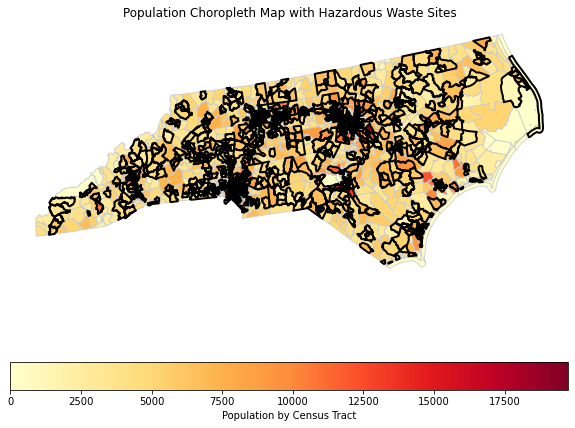

In [33]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# display(Code(all_code, language='python'))

all_code = solution.execute_complete_program(code=all_code, try_cnt=10)